In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\dg\Downloads\Data-Collisions.csv")
df.head()

c:\users\dg\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [5]:
df['SPEEDING'].replace(np.nan,'N',inplace=True)

In [6]:
df_acc = df[['SEVERITYCODE','ADDRTYPE','LOCATION', 'JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
df_acc.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,5TH AVE NE AND NE 103RD ST,At Intersection (intersection related),Overcast,Wet,Daylight,N
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Mid-Block (not related to intersection),Clear,Dry,Daylight,N
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,At Intersection (intersection related),Raining,Wet,Daylight,N


In [7]:
df_acc.describe(include = "all")

,SEVERITYCODE,ADDRTYPE,LOCATION,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
count,194673.000000,192747,191996,188344,189592,189661,189503,194673
unique,NaN,3,24102,7,11,9,9,2
top,NaN,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,Mid-Block (not related to intersection),Clear,Dry,Daylight,N
freq,NaN,126926,276,89800,111135,124510,116137,185340
mean,1.298901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.457778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from scipy import stats
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score, log_loss, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
missing_data = df_acc.isnull()
missing_data
missing_data.values.tolist()

[[False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, True, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, True, True, True, False],
 [False, False, False, False, False, False, False, False],
 

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64



In [11]:
df_acc['LOCATION'].replace(np.nan,'Unknown', inplace=True)
df_acc['WEATHER'].replace(np.nan,'Unknown', inplace=True)
df_acc['ROADCOND'].replace(np.nan,'Unknown', inplace=True)
df_acc['JUNCTIONTYPE'].replace(np.nan,'Unknown', inplace=True)
df_acc['ADDRTYPE'].replace(np.nan,'Unknown', inplace=True)
df_acc['LIGHTCOND'].replace(np.nan,'Unknown', inplace=True)

c:\users\dg\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)



### reducing the sample so as to avoid bias

In [12]:
df_acc["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [13]:
#to balance label by undersampling

target="SEVERITYCODE"
minority_class_len = len(df_acc[df_acc[target] ==2])
majority_class_indices = df_acc[df_acc[target] ==1].index
random_majority_indices = np.random.choice(majority_class_indices,minority_class_len, replace = False)
minority_class_indices = df_acc[df_acc[target] ==2].index

under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])
df_acc = df_acc.loc[under_sample_indices]
df_acc["SEVERITYCODE"].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64


### EXPLORATORY DATA ANALYSIS

In [14]:
df_acc.describe(include="all")

,SEVERITYCODE,ADDRTYPE,LOCATION,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
count,116376.000000,116376,116376,116376,116376,116376,116376,116376
unique,NaN,4,19813,7,11,9,9,2
top,NaN,Block,Unknown,Mid-Block (not related to intersection),Clear,Dry,Daylight,N
freq,NaN,71478,1317,49498,67967,76074,71597,110327
mean,1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.500002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_acc["ADDRTYPE"].value_counts()

Block           71478
Intersection    43581
Unknown           960
Alley             357
Name: ADDRTYPE, dtype: int64

In [16]:
df_acc["LOCATION"].value_counts()

Unknown                                                           1317
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                     167
6TH AVE AND JAMES ST                                               166
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N           163
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB     161
                                                                  ... 
20TH AVE NE BETWEEN NE 133RD ST AND NE 135TH ST                      1
N 120TH ST BETWEEN GREENWOOD AVE N AND PHINNEY AVE N                 1
2ND AVE NE BETWEEN NE 89TH ST AND NE 90TH ST                         1
8TH AVE NW BETWEEN NW 52ND ST AND NW 53RD ST                         1
NE 115TH ST BETWEEN 28TH W AVE NE AND 28TH E AVE NE                  1
Name: LOCATION, Length: 19813, dtype: int64

In [17]:
df_acc["WEATHER"].value_counts()

Clear                       67967
Raining                     20469
Overcast                    16817
Unknown                      9749
Snowing                       504
Other                         418
Fog/Smog/Smoke                337
Sleet/Hail/Freezing Rain       60
Blowing Sand/Dirt              33
Severe Crosswind               17
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [18]:
df_acc["ROADCOND"].value_counts()

Dry               76074
Wet               29136
Unknown            9715
Ice                 686
Snow/Slush          523
Other                79
Standing Water       76
Sand/Mud/Dirt        48
Oil                  39
Name: ROADCOND, dtype: int64

In [19]:
df_acc["LIGHTCOND"].value_counts()

Daylight                    71597
Dark - Street Lights On     28948
Unknown                      9048
Dusk                         3606
Dawn                         1533
Dark - No Street Lights       834
Dark - Street Lights Off      671
Other                         131
Dark - Unknown Lighting         8
Name: LIGHTCOND, dtype: int64

In [20]:
df_acc["SPEEDING"].value_counts()

N    110327
Y      6049
Name: SPEEDING, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B9D10F0>,
      dtype=object)

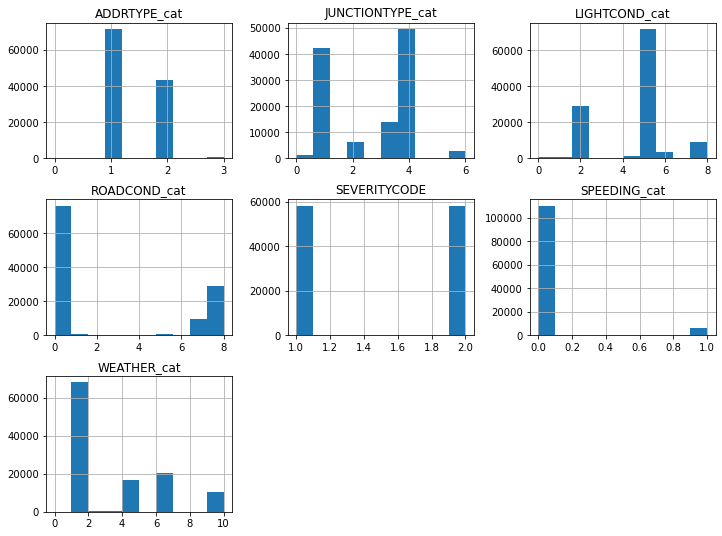

In [39]:
df_acc.hist(figsize=(12,9))



### MODEL EVALUATION

In [21]:
# label encoding

from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
df_acc['WEATHER']=df_acc['WEATHER'].astype('str')
df_acc['WEATHER_cat']= label_encoder.fit_transform(df_acc['WEATHER']) 

df_acc['ADDRTYPE']=df_acc['ADDRTYPE'].astype('str')
df_acc['ADDRTYPE_cat']= label_encoder.fit_transform(df_acc['ADDRTYPE']) 

df_acc['JUNCTIONTYPE']=df_acc['JUNCTIONTYPE'].astype('str')
df_acc['JUNCTIONTYPE_cat']= label_encoder.fit_transform(df_acc['JUNCTIONTYPE']) 

df_acc['ROADCOND']=df_acc['ROADCOND'].astype('str')
df_acc['ROADCOND_cat']= label_encoder.fit_transform(df_acc['ROADCOND'])

df_acc['LIGHTCOND']=df_acc['LIGHTCOND'].astype('str')
df_acc['LIGHTCOND_cat']= label_encoder.fit_transform(df_acc['LIGHTCOND'])


df_acc['SPEEDING']=df_acc['SPEEDING'].astype('str')
df_acc['SPEEDING_cat']= label_encoder.fit_transform(df_acc['SPEEDING'])

df_acc

,SEVERITYCODE,ADDRTYPE,LOCATION,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,WEATHER_cat,ADDRTYPE_cat,JUNCTIONTYPE_cat,ROADCOND_cat,LIGHTCOND_cat,SPEEDING_cat
0,2,Intersection,5TH AVE NE AND NE 103RD ST,At Intersection (intersection related),Overcast,Wet,Daylight,N,4,2,1,8,5,0
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,At Intersection (intersection related),Raining,Wet,Daylight,N,6,2,1,8,5,0
7,2,Intersection,BROADWAY AND E PIKE ST,At Intersection (intersection related),Clear,Dry,Daylight,N,1,2,1,0,5,0
9,2,Intersection,41ST AVE SW AND SW THISTLE ST,At Intersection (intersection related),Clear,Dry,Daylight,N,1,2,1,0,5,0
14,2,Block,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On,N,1,1,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91002,1,Intersection,35TH AVE SW AND SW RAYMOND ST,At Intersection (intersection related),Clear,Dry,Daylight,N,1,2,1,0,5,0
117247,1,Block,BEACON WR AVE S BETWEEN S THISTLE S ST AND S C...,Mid-Block (not related to intersection),Overcast,Wet,Daylight,Y,4,1,4,8,5,1
107486,1,Block,39TH AVE S BETWEEN S HOLDEN ST AND S KENYON ST,Mid-Block (not related to intersection),Unknown,Unknown,Unknown,N,10,1,4,7,8,0
84313,1,Block,15TH AVE NW BETWEEN NW 83RD ST AND NW 85TH ST,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N,6,1,4,8,2,0


In [22]:
#initialization
x= df_acc[['WEATHER_cat','ROADCOND_cat','LIGHTCOND_cat','SPEEDING_cat','JUNCTIONTYPE_cat','ADDRTYPE_cat']]
y=df_acc['SEVERITYCODE']


In [23]:
#Normalizing the dataset
x=preprocessing.StandardScaler().fit(x).transform(x)
x

array([[ 0.30625823,  1.46948614,  0.32113935, -0.23415363, -1.14834953,
         1.20023468],
       [ 0.99914601,  1.46948614,  0.32113935, -0.23415363, -1.14834953,
         1.20023468],
       [-0.73307343, -0.71720157,  0.32113935, -0.23415363, -1.14834953,
         1.20023468],
       ...,
       [ 2.38492156,  1.19615017,  2.0665856 , -0.23415363,  0.89086075,
        -0.76066086],
       [ 0.99914601,  1.46948614, -1.42430689, -0.23415363,  0.89086075,
        -0.76066086],
       [-0.73307343, -0.71720157,  0.32113935, -0.23415363,  0.89086075,
        -0.76066086]])

In [24]:
#Splitting the data as 70 % for training and 30 % for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (81463, 6) (81463,)
Test set: (34913, 6) (34913,)



### MODELLING AND PREDICTIONS

#### K-Nearest Neighbors

In [25]:
# Training the Model
from sklearn.neighbors import KNeighborsClassifier
k=25

kneigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
k_y_pred = kneigh.predict(x_test)
k_y_pred[0:5]

array([2, 2, 2, 1, 2], dtype=int64)

In [26]:
#Model Evaluation
j1=jaccard_score(y_test,k_y_pred)
f1=f1_score(y_test,k_y_pred, average = 'macro')
print("Jaccard Score: ",j1)
print("F1 Score: ",f1)

Jaccard Score:  0.4484744271603951
F1 Score:  0.6044047988770804


#### Decision Tree

In [27]:
# Training the Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier (criterion = 'entropy', max_depth = 8)

dt.fit(x_train, y_train)
dt_y_pred = dt.predict(x_test)
dt_y_pred[0:5]

array([2, 2, 2, 1, 2], dtype=int64)

In [28]:
#Model Evaluation
j2=jaccard_score(y_test,dt_y_pred)
f2=f1_score(y_test,dt_y_pred, average = 'macro')
print("Jaccard Score: ",j2)
print("F1 Score: ",f2)

Jaccard Score:  0.4377799581929099
F1 Score:  0.6220648766330797


#### Linear Regression

In [29]:
# Training the Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C = 6, solver = 'liblinear').fit(x_train, y_train)

lr_y_pred = lr.predict(x_test)
lr_y_prob = lr.predict_proba(x_test)
lr_y_prob

array([[0.34676015, 0.65323985],
       [0.34676015, 0.65323985],
       [0.34676015, 0.65323985],
       ...,
       [0.58453976, 0.41546024],
       [0.30376911, 0.69623089],
       [0.43251769, 0.56748231]])

In [30]:
#Model Evaluation
j3=jaccard_score(y_test,lr_y_pred)
f3=f1_score(y_test,lr_y_pred, average = 'macro')
print("Jaccard Score: ",j3)
print("F1 Score: ",f3)
print("Log Loss: ",log_loss(y_test,lr_y_prob))

Jaccard Score:  0.4564254062038405
F1 Score:  0.6092127598276056
Log Loss:  0.6547129868420885


In [31]:
result = {'ML Model':['KNN','Decision Tree', 'Linear Regression'], 'Jaccard Score':[j1, j2, j3], 'F1 Score':[f1, f2, f3]}
result = pd.DataFrame.from_dict(result)
result

,ML Model,Jaccard Score,F1 Score
0,KNN,0.448474,0.604405
1,Decision Tree,0.437780,0.622065
2,Linear Regression,0.456425,0.609213


## Conclusion <a name="conclusion"></a>

it can be concluded that Decision Tree is the most ideal model for this case.